In [3]:
!pip install wordcloud

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Load the dataset
df = pd.read_csv(r'C:\Users\vinay\Downloads\archive (15)\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# shape and basic info
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# nulls
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# unique content types
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [11]:
#columns
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Fill missing values (where appropriate)
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [21]:
df['genre_list'] = df['listed_in'].apply(lambda x: x.split(", ") if pd.notnull(x) else [])
df['genre_list'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre_list, dtype: object

In [22]:
from collections import Counter

all_genres = [genre for sublist in df['genre_list'] for genre in sublist]
genre_counter = Counter(all_genres)

# Convert to DataFrame for plotting
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

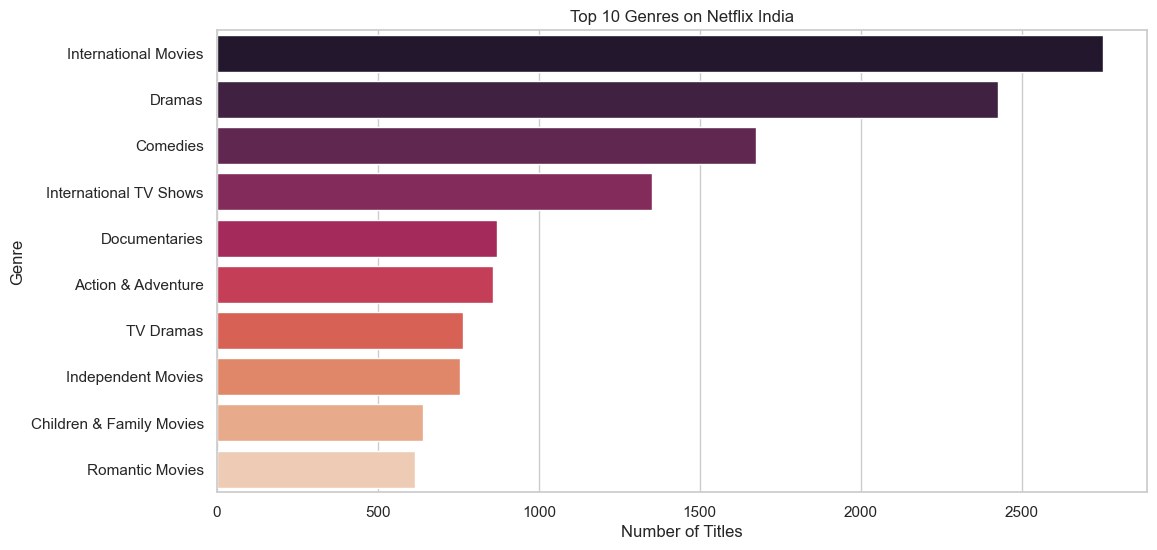

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_genres, y='Genre', x='Count', palette='rocket')
plt.title("Top 10 Genres on Netflix India")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

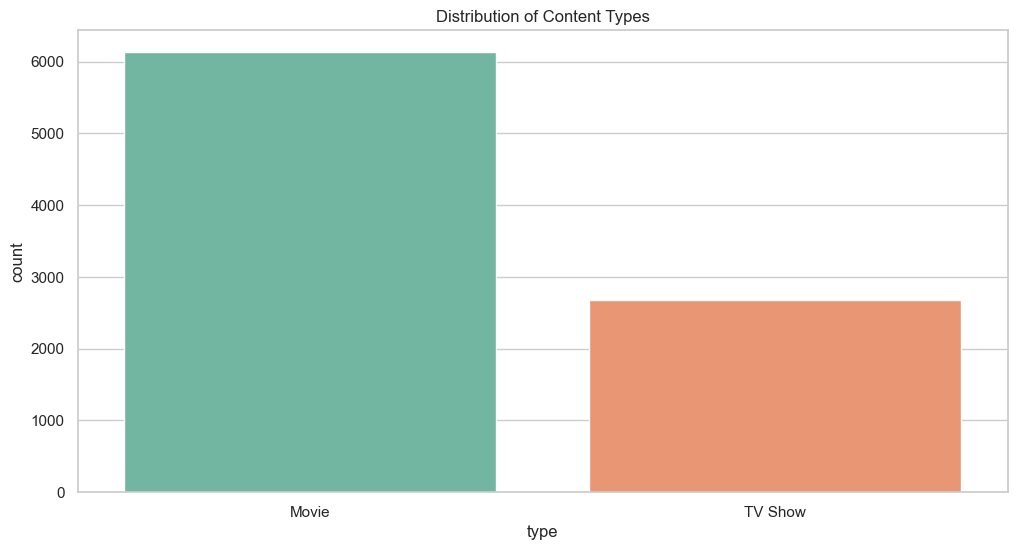

In [24]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types')
plt.show()

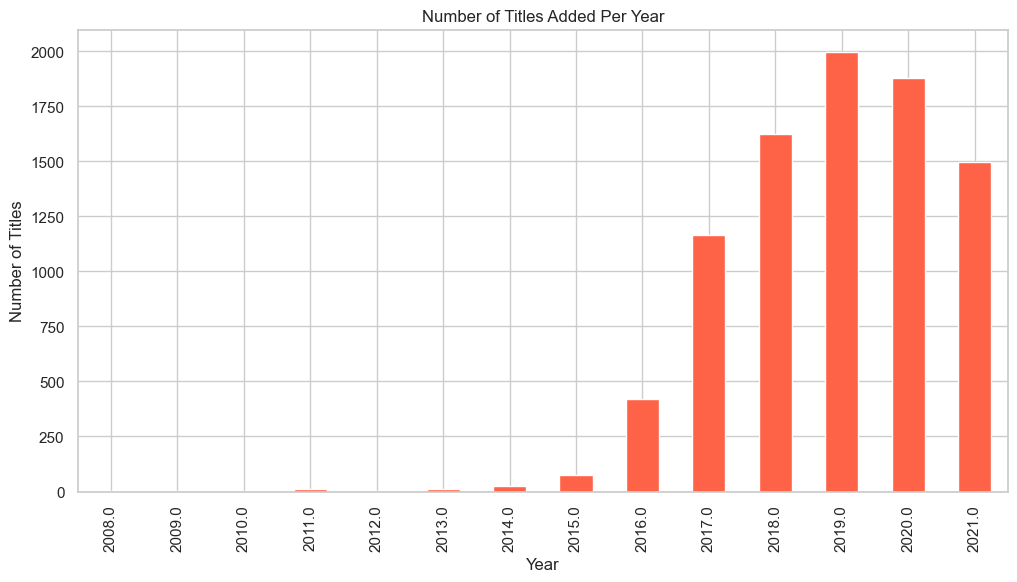

In [25]:
df['year_added'].value_counts().sort_index().plot(kind='bar', color='tomato')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

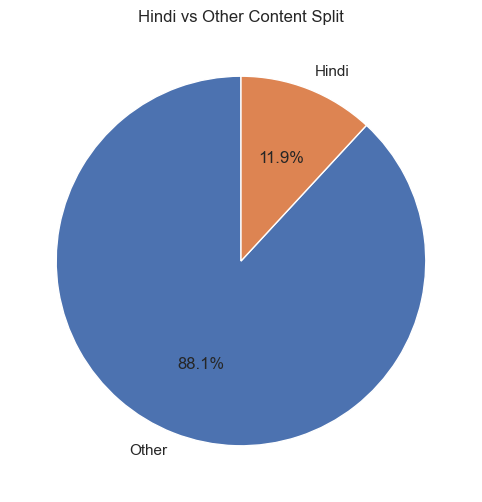

In [26]:
df['language'] = df['country'].apply(lambda x: 'Hindi' if 'India' in x else 'Other')
df['language'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Hindi vs Other Content Split")
plt.ylabel('')
plt.show()

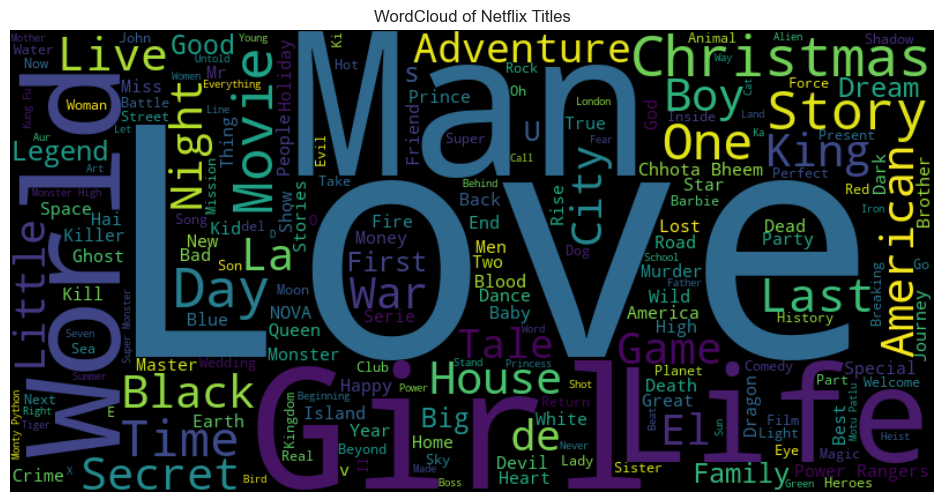

In [27]:
title_wc = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['title'].dropna()))
plt.imshow(title_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Netflix Titles")
plt.show()